In [555]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

In [556]:
df = pd.read_csv("C:/Users/gouta/OneDrive - andrew.cmu.edu/Documents/CMU_Fall_2024/95851_DSPM/HW1/customer_sales.csv")

In [557]:
df

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity
0,BN-2011-7407039,1/1/11,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,$45,-26.0,3.0
1,AZ-2011-9050313,1/3/11,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,$854,290.0,7.0
2,AZ-2011-6674300,1/4/11,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,$140,21.0,3.0
3,BN-2011-2819714,1/4/11,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,$27,-22.0,2.0
4,BN-2011-2819714,1/4/11,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,$17,-1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,AZ-2014-766953,12/31/14,Jose Gambino,United Kingdom,England,Maidenhead,North,Corporate,Economy,Furniture,Bookcases,"Ikea Stackable Bookrack, Traditional",0.0,$245,91.0,2.0
8043,BN-2014-4140795,12/31/14,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Art,"BIC Pencil Sharpener, Fluorescent",0.5,$30,-10.0,2.0
8044,BN-2014-4140795,12/31/14,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Binders,"Avery Binder Covers, Recycled",0.5,$23,-6.0,4.0
8045,BN-2014-4140795,12/31/14,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Technology,Machines,"StarTech Phone, Red",0.5,$108,-19.0,3.0


<h1> Step-1 Question-1 -- Missing Values </h1>

In [559]:
df['Sales'] = df['Sales'].replace({'\$': '', ',': '', '\(': '-', '\)': ''}, regex=True)
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
mean_sales = df['Sales'].mean()
df['Sales'].fillna(mean_sales, inplace=True)
print(df['Sales'])

0        45.0
1       854.0
2       140.0
3        27.0
4        17.0
        ...  
8042    245.0
8043     30.0
8044     23.0
8045    108.0
8046    867.0
Name: Sales, Length: 8047, dtype: float64


In [560]:
df.isnull().sum()

Order ID          0
Order Date        6
Customer Name     1
Country           1
State             4
City              4
Region            0
Segment           1
Ship Mode         5
Category          5
Sub-Category      0
Product Name      0
Discount          7
Sales             0
Profit           13
Quantity         13
dtype: int64

In [561]:
df.dtypes

Order ID          object
Order Date        object
Customer Name     object
Country           object
State             object
City              object
Region            object
Segment           object
Ship Mode         object
Category          object
Sub-Category      object
Product Name      object
Discount         float64
Sales            float64
Profit           float64
Quantity         float64
dtype: object

<h1>Step-1 Question-2 -- Date Range</h1>

In [563]:
#Convert Order data to Date type
df['Date']=pd.to_datetime(df['Order Date'])
# The date range is from 2011-01-01 00:00:00 to 2014-12-31 00:00:00
print("Minimum Date in the dataset=", df['Date'].min())
print("Maximum Date in the dataset=", df['Date'].max())

Minimum Date in the dataset= 2011-01-01 00:00:00
Maximum Date in the dataset= 2014-12-31 00:00:00


C:\Users\gouta\AppData\Local\Temp\ipykernel_34688\3363327166.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Order Date'])


<h1>Step-1 Question-3 -- Unique Customers </h1>

In [565]:
unique_customers_df = df['Customer Name'].nunique()
print(f"The number of unique customers in the dataset is {unique_customers_df}.")

The number of unique customers in the dataset is 792.


<h1>Step-1 Question-4 -- Unique Orders</h1>

In [567]:
unique_orders_df = df['Order ID'].nunique()
print(f"The number of unique orders in the dataset is {unique_orders_df}.")

The number of unique orders in the dataset is 4117.


<h1>Step-1 Question-5 -- Descriptive Statistics</h1>

In [569]:
sales_stats = df['Sales'].describe()

# Calculate variance and standard deviation
sales_variance = df['Sales'].var()
sales_std_dev = df['Sales'].std()

# Print the descriptive statistics
print("Descriptive Statistics for 'Sales':")
print(f"Min: {sales_stats['min']}")
print(f"Max: {sales_stats['max']}")
print(f"Mean: {sales_stats['mean']}")
print(f"Variance: {sales_variance}")
print(f"Standard Deviation: {sales_std_dev}")

Descriptive Statistics for 'Sales':
Min: -110.0
Max: 206000.0
Mean: 342.5429459291485
Variance: 10353423.526275251
Standard Deviation: 3217.6736202224197


<h1>Step-1 Question-6 -- Yearly change in Sales</h1>

In [571]:
df_con = df.groupby(df['Date'].dt.year)['Sales'].sum().reset_index()
df_con

,Date,Sales
0,2011.0,616218.085892
1,2012.0,548880.000000
2,2013.0,836018.000000
3,2014.0,754796.000000


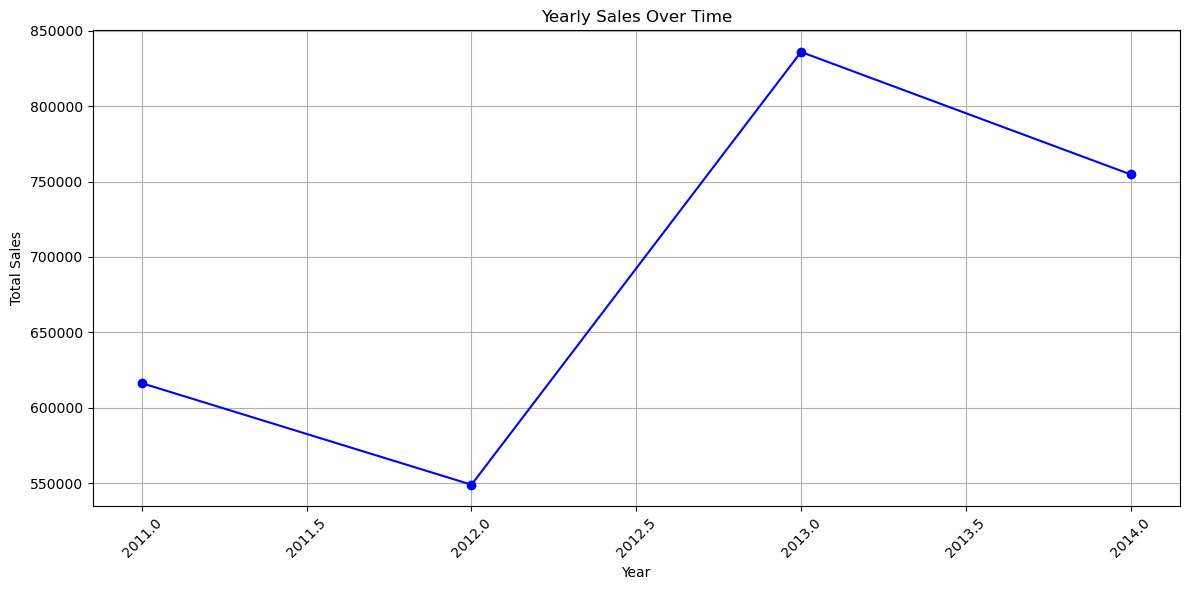

In [572]:
df['Year'] = df['Date'].dt.year
yearly_sales = df.groupby('Year')['Sales'].sum()
# Plotting the yearly sales data
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales.index, yearly_sales, marker='o', linestyle='-', color='blue')
plt.title('Yearly Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

<h2>With change in years the sales shows a decline from 2011 to 2012 and then a spike till 2013 and slight decline in 2014 </h2>

<h1>Step-2 Question-1 -- Outlier Detection</h1>

In [575]:
df['Sales'].describe()

count      8047.000000
mean        342.542946
std        3217.673620
min        -110.000000
25%          48.000000
50%         116.000000
75%         313.500000
max      206000.000000
Name: Sales, dtype: float64

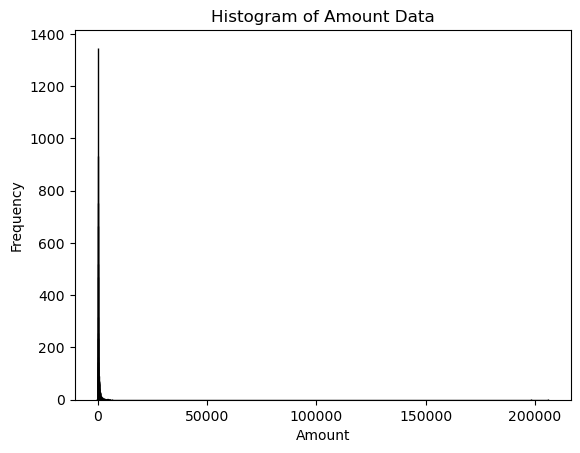

In [576]:
#Graph with Outliers
plt.hist(df['Sales'], bins='auto', edgecolor='black')
plt.title('Histogram of Amount Data')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [577]:
df=df[df['Sales'] >= 0]
sales_mean = df['Sales'].mean()
df['Sales'].fillna(sales_mean, inplace=True)

C:\Users\gouta\AppData\Local\Temp\ipykernel_34688\2070140869.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'].fillna(sales_mean, inplace=True)


In [578]:
df['Sales'].describe()

count      8044.000000
mean        342.698917
std        3218.263474
min           0.000000
25%          48.000000
50%         117.000000
75%         314.000000
max      206000.000000
Name: Sales, dtype: float64

In [579]:
#There is a 0 value in sales
df.sort_values(by='Sales')

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Date,Year
381,AZ-2011-309750,5/19/11,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,Paper,"Xerox Memo Slips, Multicolor",0.0,0.0,0.0,1.0,2011-05-19,2011.0
2162,BN-2012-8400051,6/29/12,Kristen Holland,Sweden,Stockholm,Solna,North,Consumer,Economy,Office Supplies,Labels,"Hon Round Labels, Laser Printer Compatible",0.5,3.0,-1.0,1.0,2012-06-29,2012.0
3388,AZ-2013-273412,1/14/13,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",0.0,4.0,0.0,1.0,2013-01-14,2013.0
7097,BN-2014-5531507,9/15/14,Kayla Tearle,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Labels,"Hon Removable Labels, Adjustable",0.5,4.0,-3.0,1.0,2014-09-15,2014.0
1185,BN-2011-5491702,11/16/11,Claudia Poore,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Binders,"Ibico Hole Reinforcements, Durable",0.5,4.0,-2.0,1.0,2011-11-16,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7590,AZ-2014-6530154,11/19/14,Bettie Lang,France,Nord-Pas-de-Calais-Picardie,Lille,Central,Consumer,Economy,Furniture,Chairs,"Hon Executive Leather Armchair, Adjustable",0.1,5729.0,64.0,14.0,2014-11-19,2014.0
3196,AZ-2012-9218935,12/13/12,Lara Giles,United Kingdom,England,Huddersfield,North,Consumer,Economy,Technology,Phones,"Motorola Smart Phone, Cordless",0.0,5785.0,405.0,9.0,2012-12-13,2012.0
868,AZ-2011-5313166,9/8/11,Alexander Bond,Spain,Galicia,Lugo,South,Corporate,Economy Plus,Office Supplies,Appliances,"Hamilton Beach Stove, Silver",0.0,6517.0,2476.0,12.0,2011-09-08,2011.0
28,BN-2011-4913858,1/13/11,Julian Dobie,Netherlands,South Holland,Dordrecht,Central,Consumer,Economy,Office Supplies,Storage,"Smead Lockers, Blue",0.5,198000.0,-131.0,2.0,2011-01-13,2011.0


In [580]:
#detect and handle outliers in the Amount column using the Interquartile Range (IQR) method
# Calculate the IQR of the Amount field
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_boundary = Q1 - 1.5 * IQR
upper_boundary = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df[(df['Sales'] < lower_boundary) | (df['Sales'] > upper_boundary)]
outliers_count = outliers.shape[0]

lower_boundary, upper_boundary, outliers_count

(-351.0, 713.0, 873)

In [581]:
df.sort_values(by= 'Sales', inplace = True)

C:\Users\gouta\AppData\Local\Temp\ipykernel_34688\501868528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by= 'Sales', inplace = True)


In [582]:
df

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Date,Year
381,AZ-2011-309750,5/19/11,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,Paper,"Xerox Memo Slips, Multicolor",0.0,0.0,0.0,1.0,2011-05-19,2011.0
2162,BN-2012-8400051,6/29/12,Kristen Holland,Sweden,Stockholm,Solna,North,Consumer,Economy,Office Supplies,Labels,"Hon Round Labels, Laser Printer Compatible",0.5,3.0,-1.0,1.0,2012-06-29,2012.0
3388,AZ-2013-273412,1/14/13,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",0.0,4.0,0.0,1.0,2013-01-14,2013.0
7097,BN-2014-5531507,9/15/14,Kayla Tearle,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Labels,"Hon Removable Labels, Adjustable",0.5,4.0,-3.0,1.0,2014-09-15,2014.0
1185,BN-2011-5491702,11/16/11,Claudia Poore,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Binders,"Ibico Hole Reinforcements, Durable",0.5,4.0,-2.0,1.0,2011-11-16,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7590,AZ-2014-6530154,11/19/14,Bettie Lang,France,Nord-Pas-de-Calais-Picardie,Lille,Central,Consumer,Economy,Furniture,Chairs,"Hon Executive Leather Armchair, Adjustable",0.1,5729.0,64.0,14.0,2014-11-19,2014.0
3196,AZ-2012-9218935,12/13/12,Lara Giles,United Kingdom,England,Huddersfield,North,Consumer,Economy,Technology,Phones,"Motorola Smart Phone, Cordless",0.0,5785.0,405.0,9.0,2012-12-13,2012.0
868,AZ-2011-5313166,9/8/11,Alexander Bond,Spain,Galicia,Lugo,South,Corporate,Economy Plus,Office Supplies,Appliances,"Hamilton Beach Stove, Silver",0.0,6517.0,2476.0,12.0,2011-09-08,2011.0
28,BN-2011-4913858,1/13/11,Julian Dobie,Netherlands,South Holland,Dordrecht,Central,Consumer,Economy,Office Supplies,Storage,"Smead Lockers, Blue",0.5,198000.0,-131.0,2.0,2011-01-13,2011.0


In [583]:
sales_mean = df['Sales'].mean()
df['Sales'].iloc[0:1]= sales_mean

C:\Users\gouta\AppData\Local\Temp\ipykernel_34688\3158774831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'].iloc[0:1]= sales_mean


In [584]:
df

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Date,Year
381,AZ-2011-309750,5/19/11,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,Paper,"Xerox Memo Slips, Multicolor",0.0,342.698917,0.0,1.0,2011-05-19,2011.0
2162,BN-2012-8400051,6/29/12,Kristen Holland,Sweden,Stockholm,Solna,North,Consumer,Economy,Office Supplies,Labels,"Hon Round Labels, Laser Printer Compatible",0.5,3.000000,-1.0,1.0,2012-06-29,2012.0
3388,AZ-2013-273412,1/14/13,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",0.0,4.000000,0.0,1.0,2013-01-14,2013.0
7097,BN-2014-5531507,9/15/14,Kayla Tearle,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Labels,"Hon Removable Labels, Adjustable",0.5,4.000000,-3.0,1.0,2014-09-15,2014.0
1185,BN-2011-5491702,11/16/11,Claudia Poore,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Binders,"Ibico Hole Reinforcements, Durable",0.5,4.000000,-2.0,1.0,2011-11-16,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7590,AZ-2014-6530154,11/19/14,Bettie Lang,France,Nord-Pas-de-Calais-Picardie,Lille,Central,Consumer,Economy,Furniture,Chairs,"Hon Executive Leather Armchair, Adjustable",0.1,5729.000000,64.0,14.0,2014-11-19,2014.0
3196,AZ-2012-9218935,12/13/12,Lara Giles,United Kingdom,England,Huddersfield,North,Consumer,Economy,Technology,Phones,"Motorola Smart Phone, Cordless",0.0,5785.000000,405.0,9.0,2012-12-13,2012.0
868,AZ-2011-5313166,9/8/11,Alexander Bond,Spain,Galicia,Lugo,South,Corporate,Economy Plus,Office Supplies,Appliances,"Hamilton Beach Stove, Silver",0.0,6517.000000,2476.0,12.0,2011-09-08,2011.0
28,BN-2011-4913858,1/13/11,Julian Dobie,Netherlands,South Holland,Dordrecht,Central,Consumer,Economy,Office Supplies,Storage,"Smead Lockers, Blue",0.5,198000.000000,-131.0,2.0,2011-01-13,2011.0


In [585]:
df['Sales'].describe()

count      8044.000000
mean        342.741520
std        3218.261205
min           3.000000
25%          48.750000
50%         117.000000
75%         314.000000
max      206000.000000
Name: Sales, dtype: float64

In [586]:
# Remove last 3 rows since they are big values
df = df.iloc[:-3]

In [587]:
df['Sales'].describe()

count    8041.000000
mean      291.816414
std       483.654052
min         3.000000
25%        48.000000
50%       117.000000
75%       313.000000
max      5785.000000
Name: Sales, dtype: float64

C:\Users\gouta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


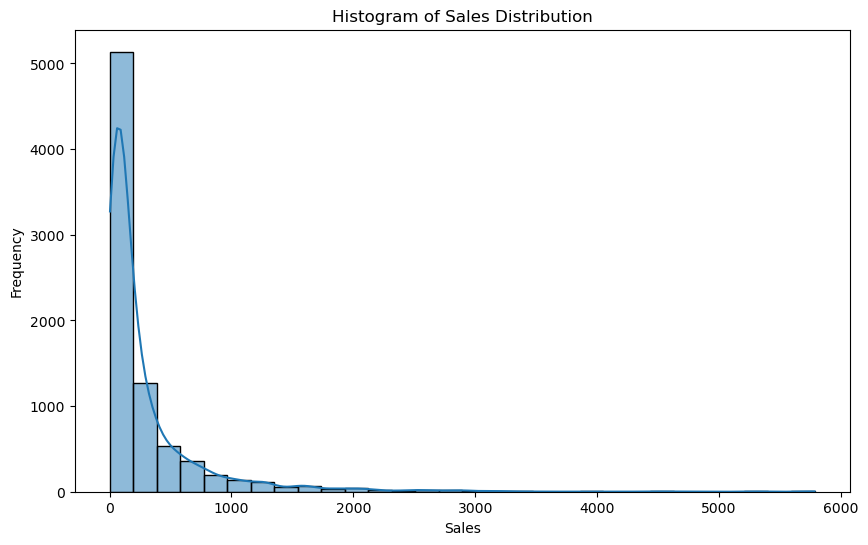

In [588]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30,kde=True)
plt.title('Histogram of Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [589]:
df

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Date,Year
381,AZ-2011-309750,5/19/11,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,Paper,"Xerox Memo Slips, Multicolor",0.0,342.698917,0.0,1.0,2011-05-19,2011.0
2162,BN-2012-8400051,6/29/12,Kristen Holland,Sweden,Stockholm,Solna,North,Consumer,Economy,Office Supplies,Labels,"Hon Round Labels, Laser Printer Compatible",0.5,3.000000,-1.0,1.0,2012-06-29,2012.0
3388,AZ-2013-273412,1/14/13,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",0.0,4.000000,0.0,1.0,2013-01-14,2013.0
7097,BN-2014-5531507,9/15/14,Kayla Tearle,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Labels,"Hon Removable Labels, Adjustable",0.5,4.000000,-3.0,1.0,2014-09-15,2014.0
1185,BN-2011-5491702,11/16/11,Claudia Poore,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Binders,"Ibico Hole Reinforcements, Durable",0.5,4.000000,-2.0,1.0,2011-11-16,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,AZ-2011-3348631,5/3/11,Ebony Sadlier,Germany,Bremen,Bremen,Central,Corporate,Economy Plus,Office Supplies,Storage,"Eldon Lockers, Single Width",0.1,5340.000000,232.0,3.0,2011-05-03,2011.0
1970,AZ-2012-5752966,5/29/12,Harrison Cooke,United Kingdom,England,Luton,North,Consumer,Immediate,Technology,Phones,"Nokia Smart Phone, Full Size",0.0,5725.000000,2461.0,9.0,2012-05-29,2012.0
3975,BN-2013-2755077,6/4/13,George To Rot,Spain,Castile and León,Valladolid,South,Corporate,Economy Plus,Technology,Phones,"Samsung Smart Phone, VoIP",0.1,5726.000000,-445.0,10.0,2013-06-04,2013.0
7590,AZ-2014-6530154,11/19/14,Bettie Lang,France,Nord-Pas-de-Calais-Picardie,Lille,Central,Consumer,Economy,Furniture,Chairs,"Hon Executive Leather Armchair, Adjustable",0.1,5729.000000,64.0,14.0,2014-11-19,2014.0


In [590]:
df.to_csv('C:/Users/gouta/OneDrive - andrew.cmu.edu/Documents/CMU_Fall_2024/95851_DSPM/HW1/customer_sales_cleaned.csv', sep='\t', encoding='utf-8', index=False, header=True)

<h2>
Ways  to treat outliers:

1) Check for Data Entry Errors: Review the data for possible misentries, such as missing decimal points, and correct those if possible.

2) Remove Outliers: In some cases, especially if outliers are due to errors, they can be removed from the dataset.
</h2>

<h1>Step-2 Question-2</h1>

In [593]:
df['Discount'].fillna(df['Discount'].mean(), inplace=True)
df['Profit'].fillna(df['Profit'].mean(), inplace=True)

# Removal of negative sales and profit values if necessary
df = df[(df['Sales'] >= 0) & (df['Profit'] >= 0)]

C:\Users\gouta\AppData\Local\Temp\ipykernel_34688\3270994919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Discount'].fillna(df['Discount'].mean(), inplace=True)
C:\Users\gouta\AppData\Local\Temp\ipykernel_34688\3270994919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Profit'].fillna(df['Profit'].mean(), inplace=True)


<Axes: xlabel='Discount', ylabel='Sales'>

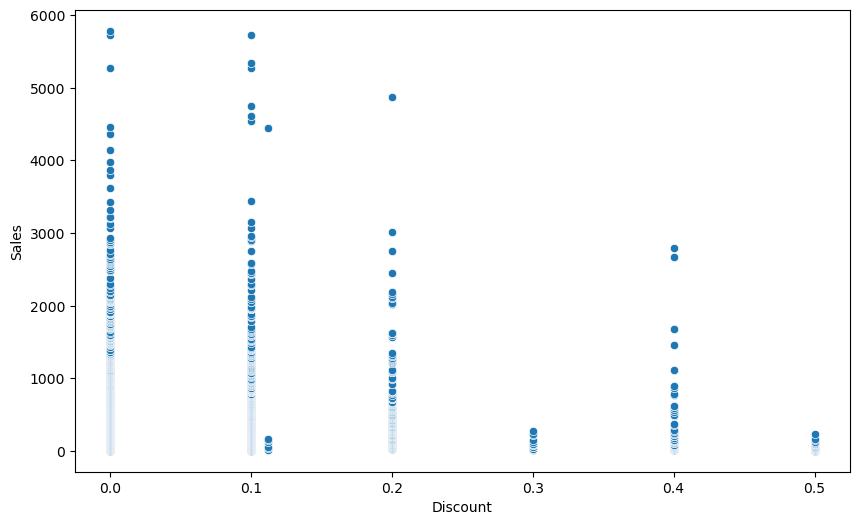

In [594]:
# Scatter plot to show the relationship between Discount and Sales
plt.figure(figsize=(10,6))
sns.scatterplot(x='Discount', y='Sales', data=df)

<Axes: xlabel='Discount', ylabel='Profit'>

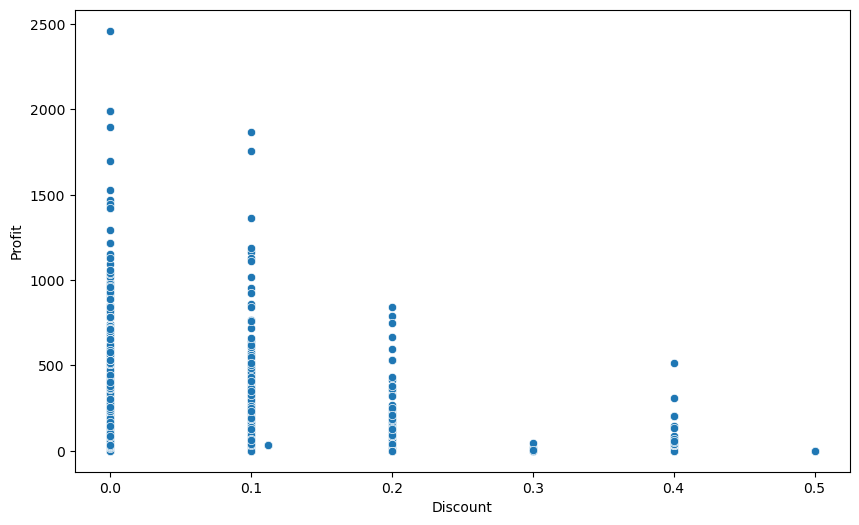

In [595]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Discount', y='Profit', data=df)

In [596]:
# Group data by discount levels and calculate the average sales and profit for each discount level
discount_sales_profit = df.groupby('Discount').agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index()

# Check what happens at 80% discount level
discount_80_sales = discount_sales_profit[discount_sales_profit['Discount'] == 0.8]

# Check the optimum discount level for maximizing profit
optimum_discount_level = discount_sales_profit.loc[discount_sales_profit['Profit'].idxmax()]

# Print the results
print(f"At 80% discount, average sales: {discount_80_sales['Sales'].values}, average profit: {discount_80_sales['Profit'].values}")
print(f"The optimum discount level for maximizing profit is: {optimum_discount_level['Discount']}, with average profit of: {optimum_discount_level['Profit']}")

At 80% discount, average sales: [], average profit: []
The optimum discount level for maximizing profit is: 0.2, with average profit of: 100.32664005897392


<h1>Step-2 Question-3<//h1>

In [598]:
df

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Date,Year
381,AZ-2011-309750,5/19/11,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,Paper,"Xerox Memo Slips, Multicolor",0.0,342.698917,0.0,1.0,2011-05-19,2011.0
3388,AZ-2013-273412,1/14/13,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",0.0,4.000000,0.0,1.0,2013-01-14,2013.0
386,BN-2011-553410,5/21/11,Bianca Monsoor,Netherlands,North Brabant,Breda,Central,Consumer,Economy Plus,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Economy",0.5,5.000000,0.0,2.0,2011-05-21,2011.0
5741,AZ-2014-2672334,2/27/14,Alexander Bond,France,Nord-Pas-de-Calais-Picardie,Wasquehal,Central,Corporate,Priority,Office Supplies,Labels,"Avery Round Labels, Adjustable",0.0,5.000000,1.0,1.0,2014-02-27,2014.0
1029,BN-2011-1778575,10/8/11,Daniel Burke,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Binders,"Cardinal Hole Reinforcements, Clear",0.5,5.000000,0.0,2.0,2011-10-08,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,AZ-2011-5059692,8/10/11,Natasha Sykes,United Kingdom,England,London,North,Consumer,Economy,Technology,Phones,"Cisco Smart Phone, Cordless",0.1,5277.000000,1759.0,9.0,2011-08-10,2011.0
319,AZ-2011-3348631,5/3/11,Ebony Sadlier,Germany,Bremen,Bremen,Central,Corporate,Economy Plus,Office Supplies,Storage,"Eldon Lockers, Single Width",0.1,5340.000000,232.0,3.0,2011-05-03,2011.0
1970,AZ-2012-5752966,5/29/12,Harrison Cooke,United Kingdom,England,Luton,North,Consumer,Immediate,Technology,Phones,"Nokia Smart Phone, Full Size",0.0,5725.000000,2461.0,9.0,2012-05-29,2012.0
7590,AZ-2014-6530154,11/19/14,Bettie Lang,France,Nord-Pas-de-Calais-Picardie,Lille,Central,Consumer,Economy,Furniture,Chairs,"Hon Executive Leather Armchair, Adjustable",0.1,5729.000000,64.0,14.0,2014-11-19,2014.0


In [599]:
# remove NaN roles
import numpy as np
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Discount', 'Quantity', 'Profit', 'Sales'])

In [600]:
import statsmodels.api as sm
df.dropna()
X = df[['Discount', 'Quantity', 'Profit']]  # Features affecting Sales
y = df['Sales']  # Dependent variable (Sales)

X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     4689.
Date:                Thu, 12 Sep 2024   Prob (F-statistic):               0.00
Time:                        20:48:42   Log-Likelihood:                -44273.
No. Observations:                6297   AIC:                         8.855e+04
Df Residuals:                    6293   BIC:                         8.858e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.5367      7.021     -3.068      0.0

<h3>Analysis of regression model:

For Discount (371.1801): A unit increase in discount (for example, a 1% increase) leads to an increase of approximately $371.18 in sales, holding other factors constant. The t-value (14.024) and p-value (0.000) indicate that this is a highly significant factor affecting sales.

Quantity (67.4481): For each additional unit of product ordered, sales increase by around $67.45. This is also highly significant, with a t-value of 32.621 and a p-value of 0.000.</h3>

<h1>Step3 -- Find the First transaction of the customer</h1>

In [603]:
df

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Date,Year
381,AZ-2011-309750,5/19/11,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,Paper,"Xerox Memo Slips, Multicolor",0.0,342.698917,0.0,1.0,2011-05-19,2011.0
3388,AZ-2013-273412,1/14/13,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",0.0,4.000000,0.0,1.0,2013-01-14,2013.0
386,BN-2011-553410,5/21/11,Bianca Monsoor,Netherlands,North Brabant,Breda,Central,Consumer,Economy Plus,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Economy",0.5,5.000000,0.0,2.0,2011-05-21,2011.0
5741,AZ-2014-2672334,2/27/14,Alexander Bond,France,Nord-Pas-de-Calais-Picardie,Wasquehal,Central,Corporate,Priority,Office Supplies,Labels,"Avery Round Labels, Adjustable",0.0,5.000000,1.0,1.0,2014-02-27,2014.0
1029,BN-2011-1778575,10/8/11,Daniel Burke,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Binders,"Cardinal Hole Reinforcements, Clear",0.5,5.000000,0.0,2.0,2011-10-08,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,AZ-2011-5059692,8/10/11,Natasha Sykes,United Kingdom,England,London,North,Consumer,Economy,Technology,Phones,"Cisco Smart Phone, Cordless",0.1,5277.000000,1759.0,9.0,2011-08-10,2011.0
319,AZ-2011-3348631,5/3/11,Ebony Sadlier,Germany,Bremen,Bremen,Central,Corporate,Economy Plus,Office Supplies,Storage,"Eldon Lockers, Single Width",0.1,5340.000000,232.0,3.0,2011-05-03,2011.0
1970,AZ-2012-5752966,5/29/12,Harrison Cooke,United Kingdom,England,Luton,North,Consumer,Immediate,Technology,Phones,"Nokia Smart Phone, Full Size",0.0,5725.000000,2461.0,9.0,2012-05-29,2012.0
7590,AZ-2014-6530154,11/19/14,Bettie Lang,France,Nord-Pas-de-Calais-Picardie,Lille,Central,Consumer,Economy,Furniture,Chairs,"Hon Executive Leather Armchair, Adjustable",0.1,5729.000000,64.0,14.0,2014-11-19,2014.0


In [604]:
dfEarlyOrder = df.groupby('Customer Name')['Year'].min()
dfEarlyOrder

Customer Name
Aaron Bootman       2011.0
Aaron Cunningham    2011.0
Aaron Davey         2011.0
Aaron Macrossan     2011.0
Abbie Perry         2011.0
                     ...  
Zara Loton          2013.0
Zara Money          2011.0
Zoe Lanigan         2011.0
Zoe Lowin           2011.0
Zona Meyer          2012.0
Name: Year, Length: 786, dtype: float64

In [605]:
dfEarlyOrder = dfEarlyOrder.reset_index()
dfEarlyOrder

,Customer Name,Year
0,Aaron Bootman,2011.0
1,Aaron Cunningham,2011.0
2,Aaron Davey,2011.0
3,Aaron Macrossan,2011.0
4,Abbie Perry,2011.0
...,...,...
781,Zara Loton,2013.0
782,Zara Money,2011.0
783,Zoe Lanigan,2011.0
784,Zoe Lowin,2011.0


In [606]:
df_final = pd.merge(df, dfEarlyOrder, on = 'Customer Name', how = 'left')
df_final

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Date,Year_x,Year_y
0,AZ-2011-309750,5/19/11,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,Paper,"Xerox Memo Slips, Multicolor",0.0,342.698917,0.0,1.0,2011-05-19,2011.0,2011.0
1,AZ-2013-273412,1/14/13,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",0.0,4.000000,0.0,1.0,2013-01-14,2013.0,2011.0
2,BN-2011-553410,5/21/11,Bianca Monsoor,Netherlands,North Brabant,Breda,Central,Consumer,Economy Plus,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Economy",0.5,5.000000,0.0,2.0,2011-05-21,2011.0,2011.0
3,AZ-2014-2672334,2/27/14,Alexander Bond,France,Nord-Pas-de-Calais-Picardie,Wasquehal,Central,Corporate,Priority,Office Supplies,Labels,"Avery Round Labels, Adjustable",0.0,5.000000,1.0,1.0,2014-02-27,2014.0,2011.0
4,BN-2011-1778575,10/8/11,Daniel Burke,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Binders,"Cardinal Hole Reinforcements, Clear",0.5,5.000000,0.0,2.0,2011-10-08,2011.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6292,AZ-2011-5059692,8/10/11,Natasha Sykes,United Kingdom,England,London,North,Consumer,Economy,Technology,Phones,"Cisco Smart Phone, Cordless",0.1,5277.000000,1759.0,9.0,2011-08-10,2011.0,2011.0
6293,AZ-2011-3348631,5/3/11,Ebony Sadlier,Germany,Bremen,Bremen,Central,Corporate,Economy Plus,Office Supplies,Storage,"Eldon Lockers, Single Width",0.1,5340.000000,232.0,3.0,2011-05-03,2011.0,2011.0
6294,AZ-2012-5752966,5/29/12,Harrison Cooke,United Kingdom,England,Luton,North,Consumer,Immediate,Technology,Phones,"Nokia Smart Phone, Full Size",0.0,5725.000000,2461.0,9.0,2012-05-29,2012.0,2012.0
6295,AZ-2014-6530154,11/19/14,Bettie Lang,France,Nord-Pas-de-Calais-Picardie,Lille,Central,Consumer,Economy,Furniture,Chairs,"Hon Executive Leather Armchair, Adjustable",0.1,5729.000000,64.0,14.0,2014-11-19,2014.0,2011.0


In [607]:
df_final.rename(columns = {'Year_y': 'OriginYear'}, inplace = True)
df_final

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Date,Year_x,OriginYear
0,AZ-2011-309750,5/19/11,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,Paper,"Xerox Memo Slips, Multicolor",0.0,342.698917,0.0,1.0,2011-05-19,2011.0,2011.0
1,AZ-2013-273412,1/14/13,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",0.0,4.000000,0.0,1.0,2013-01-14,2013.0,2011.0
2,BN-2011-553410,5/21/11,Bianca Monsoor,Netherlands,North Brabant,Breda,Central,Consumer,Economy Plus,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Economy",0.5,5.000000,0.0,2.0,2011-05-21,2011.0,2011.0
3,AZ-2014-2672334,2/27/14,Alexander Bond,France,Nord-Pas-de-Calais-Picardie,Wasquehal,Central,Corporate,Priority,Office Supplies,Labels,"Avery Round Labels, Adjustable",0.0,5.000000,1.0,1.0,2014-02-27,2014.0,2011.0
4,BN-2011-1778575,10/8/11,Daniel Burke,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Binders,"Cardinal Hole Reinforcements, Clear",0.5,5.000000,0.0,2.0,2011-10-08,2011.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6292,AZ-2011-5059692,8/10/11,Natasha Sykes,United Kingdom,England,London,North,Consumer,Economy,Technology,Phones,"Cisco Smart Phone, Cordless",0.1,5277.000000,1759.0,9.0,2011-08-10,2011.0,2011.0
6293,AZ-2011-3348631,5/3/11,Ebony Sadlier,Germany,Bremen,Bremen,Central,Corporate,Economy Plus,Office Supplies,Storage,"Eldon Lockers, Single Width",0.1,5340.000000,232.0,3.0,2011-05-03,2011.0,2011.0
6294,AZ-2012-5752966,5/29/12,Harrison Cooke,United Kingdom,England,Luton,North,Consumer,Immediate,Technology,Phones,"Nokia Smart Phone, Full Size",0.0,5725.000000,2461.0,9.0,2012-05-29,2012.0,2012.0
6295,AZ-2014-6530154,11/19/14,Bettie Lang,France,Nord-Pas-de-Calais-Picardie,Lille,Central,Consumer,Economy,Furniture,Chairs,"Hon Executive Leather Armchair, Adjustable",0.1,5729.000000,64.0,14.0,2014-11-19,2014.0,2011.0


<h1>Step-4 Calculate Cumulative Transaction Amounts</h1>

In [609]:
df_final['CustomerTenure'] = (df_final['Date'] - pd.to_datetime(df_final['OriginYear'], format='%Y')).dt.days / 31

In [610]:
df_final

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Date,Year_x,OriginYear,CustomerTenure
0,AZ-2011-309750,5/19/11,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,Paper,"Xerox Memo Slips, Multicolor",0.0,342.698917,0.0,1.0,2011-05-19,2011.0,2011.0,4.451613
1,AZ-2013-273412,1/14/13,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",0.0,4.000000,0.0,1.0,2013-01-14,2013.0,2011.0,24.000000
2,BN-2011-553410,5/21/11,Bianca Monsoor,Netherlands,North Brabant,Breda,Central,Consumer,Economy Plus,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Economy",0.5,5.000000,0.0,2.0,2011-05-21,2011.0,2011.0,4.516129
3,AZ-2014-2672334,2/27/14,Alexander Bond,France,Nord-Pas-de-Calais-Picardie,Wasquehal,Central,Corporate,Priority,Office Supplies,Labels,"Avery Round Labels, Adjustable",0.0,5.000000,1.0,1.0,2014-02-27,2014.0,2011.0,37.193548
4,BN-2011-1778575,10/8/11,Daniel Burke,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Binders,"Cardinal Hole Reinforcements, Clear",0.5,5.000000,0.0,2.0,2011-10-08,2011.0,2011.0,9.032258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6292,AZ-2011-5059692,8/10/11,Natasha Sykes,United Kingdom,England,London,North,Consumer,Economy,Technology,Phones,"Cisco Smart Phone, Cordless",0.1,5277.000000,1759.0,9.0,2011-08-10,2011.0,2011.0,7.129032
6293,AZ-2011-3348631,5/3/11,Ebony Sadlier,Germany,Bremen,Bremen,Central,Corporate,Economy Plus,Office Supplies,Storage,"Eldon Lockers, Single Width",0.1,5340.000000,232.0,3.0,2011-05-03,2011.0,2011.0,3.935484
6294,AZ-2012-5752966,5/29/12,Harrison Cooke,United Kingdom,England,Luton,North,Consumer,Immediate,Technology,Phones,"Nokia Smart Phone, Full Size",0.0,5725.000000,2461.0,9.0,2012-05-29,2012.0,2012.0,4.806452
6295,AZ-2014-6530154,11/19/14,Bettie Lang,France,Nord-Pas-de-Calais-Picardie,Lille,Central,Consumer,Economy,Furniture,Chairs,"Hon Executive Leather Armchair, Adjustable",0.1,5729.000000,64.0,14.0,2014-11-19,2014.0,2011.0,45.741935


In [611]:
#Define the Tenure Range
def TenureRangeFunc(d):
    if (d['CustomerTenure'] <= 12):
        return 12
    elif (d['CustomerTenure'] > 12 and d['CustomerTenure']<= 24):
        return 24
    elif (d['CustomerTenure'] > 24 and d['CustomerTenure']<= 36):
        return 36
    elif (d['CustomerTenure'] > 36 and d['CustomerTenure']<= 48):
        return 48
    elif (d['CustomerTenure'] > 48 and d['CustomerTenure']<= 60):
        return 60
    else:
        return 72

In [612]:
df_final['CustomerTenureRange'] = df_final.apply(TenureRangeFunc, axis = 1)
df_final

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,...,Product Name,Discount,Sales,Profit,Quantity,Date,Year_x,OriginYear,CustomerTenure,CustomerTenureRange
0,AZ-2011-309750,5/19/11,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,...,"Xerox Memo Slips, Multicolor",0.0,342.698917,0.0,1.0,2011-05-19,2011.0,2011.0,4.451613,12
1,AZ-2013-273412,1/14/13,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,...,"Wilson Jones Hole Reinforcements, Clear",0.0,4.000000,0.0,1.0,2013-01-14,2013.0,2011.0,24.000000,24
2,BN-2011-553410,5/21/11,Bianca Monsoor,Netherlands,North Brabant,Breda,Central,Consumer,Economy Plus,Office Supplies,...,"Wilson Jones Hole Reinforcements, Economy",0.5,5.000000,0.0,2.0,2011-05-21,2011.0,2011.0,4.516129,12
3,AZ-2014-2672334,2/27/14,Alexander Bond,France,Nord-Pas-de-Calais-Picardie,Wasquehal,Central,Corporate,Priority,Office Supplies,...,"Avery Round Labels, Adjustable",0.0,5.000000,1.0,1.0,2014-02-27,2014.0,2011.0,37.193548,48
4,BN-2011-1778575,10/8/11,Daniel Burke,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,...,"Cardinal Hole Reinforcements, Clear",0.5,5.000000,0.0,2.0,2011-10-08,2011.0,2011.0,9.032258,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6292,AZ-2011-5059692,8/10/11,Natasha Sykes,United Kingdom,England,London,North,Consumer,Economy,Technology,...,"Cisco Smart Phone, Cordless",0.1,5277.000000,1759.0,9.0,2011-08-10,2011.0,2011.0,7.129032,12
6293,AZ-2011-3348631,5/3/11,Ebony Sadlier,Germany,Bremen,Bremen,Central,Corporate,Economy Plus,Office Supplies,...,"Eldon Lockers, Single Width",0.1,5340.000000,232.0,3.0,2011-05-03,2011.0,2011.0,3.935484,12
6294,AZ-2012-5752966,5/29/12,Harrison Cooke,United Kingdom,England,Luton,North,Consumer,Immediate,Technology,...,"Nokia Smart Phone, Full Size",0.0,5725.000000,2461.0,9.0,2012-05-29,2012.0,2012.0,4.806452,12
6295,AZ-2014-6530154,11/19/14,Bettie Lang,France,Nord-Pas-de-Calais-Picardie,Lille,Central,Consumer,Economy,Furniture,...,"Hon Executive Leather Armchair, Adjustable",0.1,5729.000000,64.0,14.0,2014-11-19,2014.0,2011.0,45.741935,48


In [613]:
trans_amount = df_final.pivot_table(values='Sales', index='OriginYear', columns='CustomerTenureRange', aggfunc = 'sum')

In [614]:
trans_amount

CustomerTenureRange,12,24,36,48,72
OriginYear,,,,,
2011.0,324039.784809,252974.0,264342.0,317683.0,124.0
2012.0,193927.000000,146848.0,174567.0,NaN,NaN
2013.0,92867.000000,59891.0,NaN,NaN,301.0
2014.0,22653.000000,NaN,NaN,NaN,NaN


In [615]:
trans_amount = trans_amount.cumsum(axis = 1)
print(trans_amount)

CustomerTenureRange             12             24             36  \
OriginYear                                                         
2011.0               324039.784809  577013.784809  841355.784809   
2012.0               193927.000000  340775.000000  515342.000000   
2013.0                92867.000000  152758.000000            NaN   
2014.0                22653.000000            NaN            NaN   

CustomerTenureRange            48            72  
OriginYear                                       
2011.0               1.159039e+06  1.159163e+06  
2012.0                        NaN           NaN  
2013.0                        NaN  1.530590e+05  
2014.0                        NaN           NaN  


<h1>Step-5 Calculate the number of new customers</h1>

In [617]:
df_customer = df_final[df_final['OriginYear'] == df_final['Year_x']]
df_customer.sort_values(by='Customer Name')

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,...,Product Name,Discount,Sales,Profit,Quantity,Date,Year_x,OriginYear,CustomerTenure,CustomerTenureRange
2946,AZ-2011-2169445,3/21/11,Aaron Bootman,Italy,Sicily,Marsala,South,Consumer,Priority,Office Supplies,...,"Elite Box Cutter, High Speed",0.0,105.0,42.0,3.0,2011-03-21,2011.0,2011.0,2.548387,12
2412,AZ-2011-2169445,3/21/11,Aaron Bootman,Italy,Sicily,Marsala,South,Consumer,Priority,Technology,...,"Apple Office Telephone, Cordless",0.4,82.0,14.0,2.0,2011-03-21,2011.0,2011.0,2.548387,12
1467,AZ-2011-2169445,3/21/11,Aaron Bootman,Italy,Sicily,Marsala,South,Consumer,Priority,Office Supplies,...,"Harbour Creations Round Labels, Laser Printer ...",0.0,47.0,7.0,7.0,2011-03-21,2011.0,2011.0,2.548387,12
2263,AZ-2011-3937280,8/30/11,Aaron Bootman,Italy,Veneto,Vicenza,South,Consumer,Economy Plus,Furniture,...,"Tenex Light Bulb, Duo Pack",0.0,76.0,9.0,4.0,2011-08-30,2011.0,2011.0,7.774194,12
1608,AZ-2011-9409671,4/4/11,Aaron Bootman,United Kingdom,Scotland,Edinburgh,North,Consumer,Economy,Office Supplies,...,"Binney & Smith Markers, Fluorescent",0.0,51.0,14.0,2.0,2011-04-04,2011.0,2011.0,3.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732,AZ-2012-3229399,6/2/12,Zona Meyer,Germany,Lower Saxony,Oldenburg,Central,Corporate,Economy,Office Supplies,...,"Advantus Paper Clips, Metal",0.0,54.0,13.0,4.0,2012-06-02,2012.0,2012.0,4.935484,12
1580,AZ-2012-5862496,7/24/12,Zona Meyer,France,Provence-Alpes-Côte d'Azur,Nice,Central,Corporate,Economy,Office Supplies,...,"Green Bar Parchment Paper, Recycled",0.0,50.0,23.0,3.0,2012-07-24,2012.0,2012.0,6.612903,12
1497,AZ-2012-5862496,7/24/12,Zona Meyer,France,Provence-Alpes-Côte d'Azur,Nice,Central,Corporate,Economy,Office Supplies,...,"Fellowes Folders, Blue",0.1,48.0,21.0,2.0,2012-07-24,2012.0,2012.0,6.612903,12
924,AZ-2012-5862496,7/24/12,Zona Meyer,France,Provence-Alpes-Côte d'Azur,Nice,Central,Corporate,Economy,Office Supplies,...,"SanDisk Parchment Paper, Premium",0.0,33.0,6.0,2.0,2012-07-24,2012.0,2012.0,6.612903,12


In [618]:
df_customer.duplicated(subset = ['Customer Name']).value_counts()

True     1402
False     786
Name: count, dtype: int64

In [619]:
df_cust_noDup = df_customer.drop_duplicates(subset = ['Customer Name'])
df_cust_noDup

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,...,Product Name,Discount,Sales,Profit,Quantity,Date,Year_x,OriginYear,CustomerTenure,CustomerTenureRange
0,AZ-2011-309750,5/19/11,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,...,"Xerox Memo Slips, Multicolor",0.0,342.698917,0.0,1.0,2011-05-19,2011.0,2011.0,4.451613,12
2,BN-2011-553410,5/21/11,Bianca Monsoor,Netherlands,North Brabant,Breda,Central,Consumer,Economy Plus,Office Supplies,...,"Wilson Jones Hole Reinforcements, Economy",0.5,5.000000,0.0,2.0,2011-05-21,2011.0,2011.0,4.516129,12
4,BN-2011-1778575,10/8/11,Daniel Burke,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,...,"Cardinal Hole Reinforcements, Clear",0.5,5.000000,0.0,2.0,2011-10-08,2011.0,2011.0,9.032258,12
6,AZ-2011-8844789,4/27/11,Lori Miller,France,Normandy,Le Petit-Quevilly,Central,Consumer,Economy,Office Supplies,...,"Cardinal Hole Reinforcements, Clear",0.0,5.000000,2.0,1.0,2011-04-27,2011.0,2011.0,3.741935,12
7,AZ-2014-4668799,8/11/14,Alexandra Portus,Belgium,Antwerp,Antwerp,Central,Corporate,Economy,Office Supplies,...,"Wilson Jones Hole Reinforcements, Recycled",0.0,5.000000,1.0,1.0,2014-08-11,2014.0,2014.0,7.161290,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164,AZ-2011-2669880,12/1/11,Julian Corbin,Spain,Valenciana,Valencia,South,Home Office,Economy Plus,Technology,...,"Brother Wireless Fax, Laser",0.0,1894.000000,701.0,5.0,2011-12-01,2011.0,2011.0,10.774194,12
6191,AZ-2011-4087409,6/11/11,Anna Leal,Austria,Vienna,Vienna,Central,Consumer,Priority,Furniture,...,"Ikea Classic Bookcase, Metal",0.0,2056.000000,391.0,5.0,2011-06-11,2011.0,2011.0,5.193548,12
6248,BN-2013-8861319,9/5/13,Louie Bryant,Italy,Veneto,Treviso,South,Corporate,Economy Plus,Technology,...,"Hewlett Wireless Fax, Color",0.0,2671.000000,534.0,7.0,2013-09-05,2013.0,2013.0,7.967742,12
6252,AZ-2012-6569540,5/16/12,Janet Broussard,Spain,Madrid,Parla,South,Consumer,Economy,Furniture,...,"Sauder Library with Doors, Traditional",0.0,2713.000000,27.0,7.0,2012-05-16,2012.0,2012.0,4.387097,12


In [620]:
New_customers = df_final.groupby('OriginYear')['Customer Name'].nunique()
New_customers

OriginYear
2011.0    433
2012.0    219
2013.0    102
2014.0     32
Name: Customer Name, dtype: int64

In [621]:
unpivot_trans = trans_amount.reset_index().melt(id_vars=["OriginYear"], var_name="CustomerTenure", value_name="Value")
unpivot_trans

,OriginYear,CustomerTenure,Value
0,2011.0,12,3.240398e+05
1,2012.0,12,1.939270e+05
2,2013.0,12,9.286700e+04
3,2014.0,12,2.265300e+04
4,2011.0,24,5.770138e+05
5,2012.0,24,3.407750e+05
6,2013.0,24,1.527580e+05
7,2014.0,24,NaN
8,2011.0,36,8.413558e+05
9,2012.0,36,5.153420e+05


In [622]:
df_final_trans = unpivot_trans.merge(New_customers, on = 'OriginYear', how = 'left')
#Note: Unpivot by default takes Column name as Customer ID, we need to change it NewCustCount below
df_final_trans.rename(columns = {'Customer Name': 'NewCustCount'}, inplace = True)
df_final_trans

,OriginYear,CustomerTenure,Value,NewCustCount
0,2011.0,12,3.240398e+05,433
1,2012.0,12,1.939270e+05,219
2,2013.0,12,9.286700e+04,102
3,2014.0,12,2.265300e+04,32
4,2011.0,24,5.770138e+05,433
5,2012.0,24,3.407750e+05,219
6,2013.0,24,1.527580e+05,102
7,2014.0,24,NaN,32
8,2011.0,36,8.413558e+05,433
9,2012.0,36,5.153420e+05,219


<h1>Step-6 Historic CLV</h1>

In [624]:
df_final_trans['CLV'] = df_final_trans['Value'] / df_final_trans['NewCustCount']
df_final_trans

,OriginYear,CustomerTenure,Value,NewCustCount,CLV
0,2011.0,12,3.240398e+05,433,748.359780
1,2012.0,12,1.939270e+05,219,885.511416
2,2013.0,12,9.286700e+04,102,910.460784
3,2014.0,12,2.265300e+04,32,707.906250
4,2011.0,24,5.770138e+05,433,1332.595346
5,2012.0,24,3.407750e+05,219,1556.050228
6,2013.0,24,1.527580e+05,102,1497.627451
7,2014.0,24,NaN,32,NaN
8,2011.0,36,8.413558e+05,433,1943.084953
9,2012.0,36,5.153420e+05,219,2353.159817


In [625]:
CLV_table = df_final_trans.pivot_table(values='CLV', index='OriginYear', columns='CustomerTenure', aggfunc = 'sum')

In [626]:
CLV_table

CustomerTenure,12,24,36,48,72
OriginYear,,,,,
2011.0,748.359780,1332.595346,1943.084953,2676.763937,2677.050311
2012.0,885.511416,1556.050228,2353.159817,0.000000,0.000000
2013.0,910.460784,1497.627451,0.000000,0.000000,1500.578431
2014.0,707.906250,0.000000,0.000000,0.000000,0.000000


C:\Users\gouta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gouta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CustomerTenure', ylabel='CLV'>

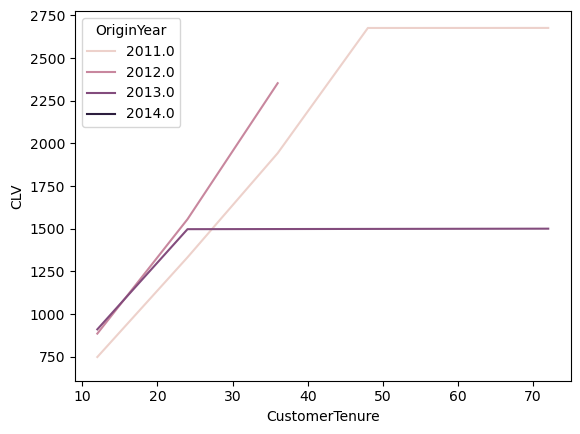

In [627]:
sns.lineplot(x = df_final_trans['CustomerTenure'], y = df_final_trans['CLV'], hue = df_final_trans['OriginYear'])

In [628]:
#Volume weighted average
# We take the average of each age group over all the years to arrive at the following.a
df_final_trans.groupby('CustomerTenure')['CLV'].mean()

CustomerTenure
12     813.059557
24    1462.091008
36    2148.122385
48    2676.763937
72    2088.814371
Name: CLV, dtype: float64

<h1>Step-7 Interpretation</h1>

* Customers have spent 969.617066 till date
* Customer retention is strong and there is a gradual increase in the spending by old customers until 48 months indicating strong customer retention, but past the 48 months it's less likely customers spend less. The CLV tends to increase with Customer Tenure, suggesting that customers who have been associated with the business until 48 months contribute more value. Post that, the business should focus on acquiring new customers or implement a feature which can attract the retained customers to spend again.
